# 3주차

### 이상거래 데이터를 통한 SVM 및 Decision Tree 
[Credit Card Fraud Detection](https://www.kaggle.com/mlg-ulb/creditcardfraud)

## -  [Credit card dataset: SVM Classification](https://www.kaggle.com/pierra/credit-card-dataset-svm-classification)

## 1. 데이터 및 라이브러리 불러오기

In [1]:
#Importing librairies

import pandas as pd 
import numpy as np

# Scikit-learn library: For SVM
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn import svm

import itertools

# Matplotlib library to plot the charts
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab

# Library for the statistic data vizualisation
import seaborn

%matplotlib inline

In [2]:
data = pd.read_csv('C:/data/creditcard.csv')
df = pd.DataFrame(data) 

In [3]:
df.describe()
#데이터의 통계량을 확인할 수 있다.

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


## 2. 데이터 시각화

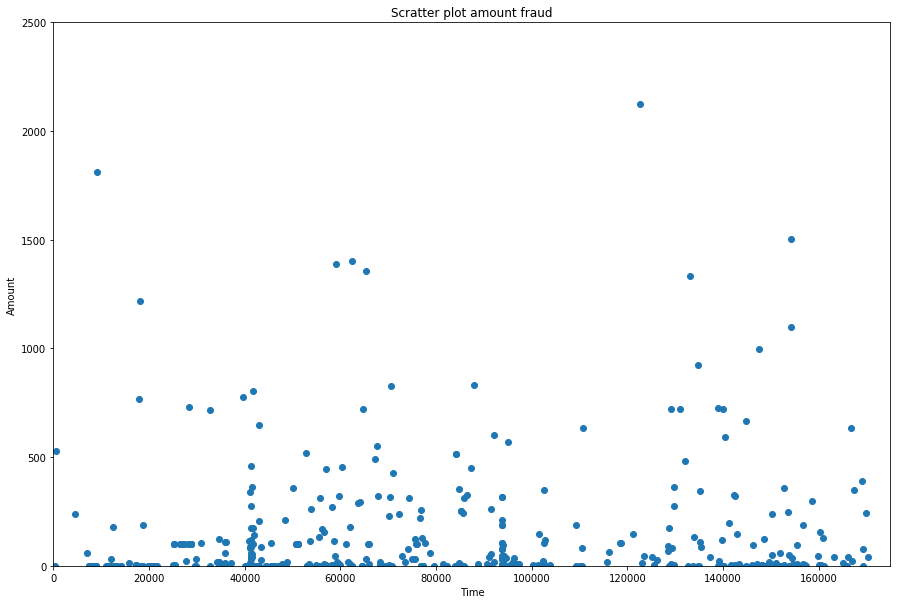

In [4]:
df_fraud = df[df['Class'] == 1] # 이상거래 데이터
plt.figure(figsize=(15,10))
plt.scatter(df_fraud['Time'], df_fraud['Amount']) #시간에 따른 이상거래량 확인
plt.title('Scratter plot amount fraud')
plt.xlabel('Time')
plt.ylabel('Amount')
plt.xlim([0,175000])
plt.ylim([0,2500])
plt.show()

> 시간은 이상거래에 중요한 영향을 미치지 않는다는것을 확인

In [5]:
nb_big_fraud = df_fraud[df_fraud['Amount'] > 1000].shape[0] # Recovery of frauds over 1000
print('There are only '+ str(nb_big_fraud) + ' frauds where the amount was bigger than 1000 over ' + str(df_fraud.shape[0]) + ' frauds')

There are only 9 frauds where the amount was bigger than 1000 over 492 frauds


> 금액이 1000보다 큰 이상거래는 9건이다. 

In [6]:
number_fraud = len(data[data.Class == 1])
number_no_fraud = len(data[data.Class == 0])
print('There are only '+ str(number_fraud) + ' frauds in the original dataset, even though there are ' + str(number_no_fraud) +' no frauds in the dataset.')

There are only 492 frauds in the original dataset, even though there are 284315 no frauds in the dataset.


> 정상거래량이 284315건 인것에 비하여 이상거래량은 492건밖에 존재하지 않는다. <br>
정상거래량이 99.8%이상이기 때문에 모델이 잘 학습되지 않을 것이다. 

- 이 문제를 해결하기 위하여 오버샘플링이나 언더샘플링을 도입해야 한다. 
> 언더샘플링은 매우 소수의 데이터가 전체 데이터를 대표한다고 확신할 수 있을때 이용할 수 있다. <br> 
이 데이터의 경우 99.8%에 해당하는 정상거래가 언더샘플링을 사용할 수 있는 데이터의 예시이다. 

## 3. 변수의 상관관계

In [7]:
df_corr = df.corr() #피어슨 상관계수 사용

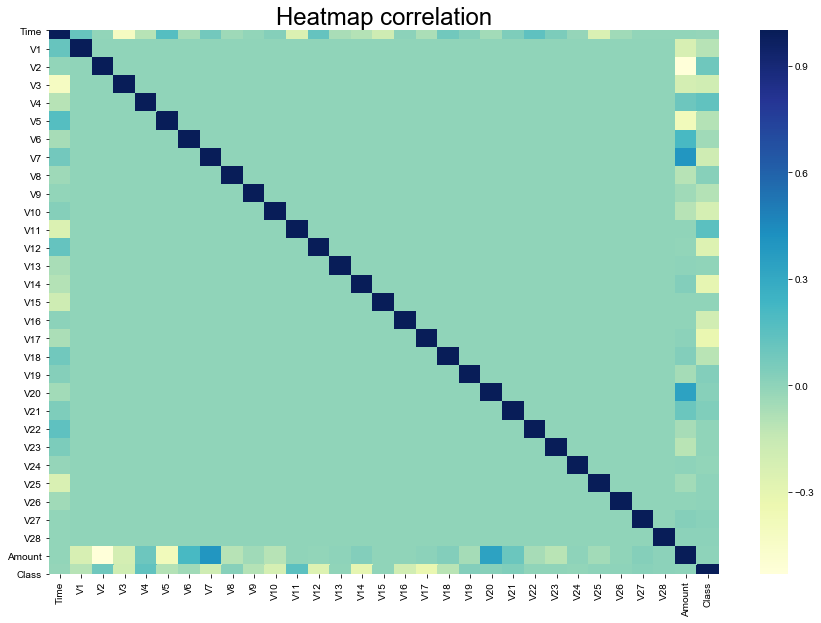

In [8]:
plt.figure(figsize=(15,10))
seaborn.heatmap(df_corr, cmap="YlGnBu") # Displaying the Heatmap
seaborn.set(font_scale=2,style='white')

plt.title('Heatmap correlation')
plt.show()

> 해당데이터는 이미 PCA처리된 변수들이기 때문에 상관관계가 없는것을 확인할 수 있다. <br><br>
일반적으로 대규모의 데이터셋에서 효과적으로 수행할 수 있는 방법은 차원을 감소시키는 것이다. 이는 가장 중요한 차원을 선택함으로써 대부분의 종속변수를 설명할 수 있다고 가정하여 정확도가 낮아지는 것을 막으며 시간을 아낄 수 있다. 
<br><br>
PCA가 이미 수행된 이 데이터에서 만약 차원 축소가 효과적이라면 PCA가 제대로 수행되지 않았음을 알 수 있다. 또한, PCA가 잘 수행된 데이터에서는 차원축소가 효과적이지 않다는 사실과 동일하다. <br><br>
해당 데이터는 상관관계가 없는것으로 보아 적절한 PCA가 수행되었으며 추가적인 PCA를 수행할 수 없다. 

## 4. Data Selection

- 오버샘플링<br>
오버샘플링을 수행하는 방법 중 하나는 클래스 간의 정확한 비율을 얻을 때 까지 잘 표현되지 않은 데이터를 복제하는 것이다. <br><br>
하지만 이 데이터의 경우 차이가 너무 심하게나기 때문에 언더샘플링을 수행할것이다. 

* 언더샘플링




In [9]:
# train set
df_train_all = df[0:150000] # rawdata를 절반씩 나눔
df_train_1 = df_train_all[df_train_all['Class'] == 1] 
df_train_0 = df_train_all[df_train_all['Class'] == 0]
# 이상거래 여부로 나눔
print('In this dataset, we have ' + str(len(df_train_1)) +" frauds so we need to take a similar number of non-fraud")

df_sample=df_train_0.sample(300)
df_train = df_train_1.append(df_sample)
#정상거래가 아닌 이상거래를 모음
df_train = df_train.sample(frac=1) # 데이터셋을 섞는다. 

In this dataset, we have 293 frauds so we need to take a similar number of non-fraud


> 우선 데이터셋을 trainset, testset으로 나눈다. 

In [10]:
# 영향을 미치지 않는 Time변수와 종속변수인 Class 제거
X_train = df_train.drop(['Time', 'Class'],axis=1) 
y_train = df_train['Class'] # 우리가 분류한 라벨 생성
X_train = np.asarray(X_train)
y_train = np.asarray(y_train)

In [11]:
####전체 테스트 셋을 통하여 모델이 적절하게 학습되었는지 확인 ###

df_test_all = df[150000:]

X_test_all = df_test_all.drop(['Time', 'Class'],axis=1)
y_test_all = df_test_all['Class']
X_test_all = np.asarray(X_test_all)
y_test_all = np.asarray(y_test_all)

## 5. 혼동행렬

In [12]:
class_names=np.array(['0','1'])
# 1 = 이상거래 0 = 정상거래

In [13]:
# 혼동행렬 생성 함수
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd' 
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

## 6. 모델링

In [14]:
classifier = svm.SVC(kernel='linear') # SVM 분류모델 이용
classifier.fit(X_train, y_train)

SVC(kernel='linear')

## 7.모델 검정

In [15]:
prediction_SVM_all = classifier.predict(X_test_all) 
#데이터셋 전체로 검증

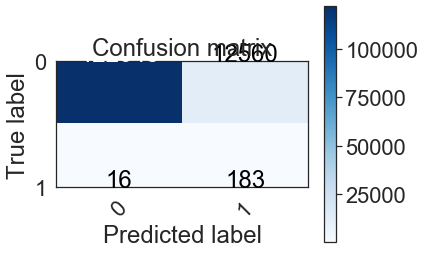

In [16]:
cm = confusion_matrix(y_test_all, prediction_SVM_all)
plot_confusion_matrix(cm,class_names)

> 혼동행렬 코드가 제대로 작동하지 않아서 다시 수정해야함

In [17]:
print('Our criterion give a result of ' 
      + str( ( (cm[0][0]+cm[1][1]) / (sum(cm[0]) + sum(cm[1])) + 4 * cm[1][1]/(cm[1][0]+cm[1][1])) / 5))

Our criterion give a result of 0.9170206071266671


In [18]:
print('We have detected ' + str(cm[1][1]) + ' frauds / ' + str(cm[1][1]+cm[1][0]) + ' total frauds.')
print('\nSo, the probability to detect a fraud is ' + str(cm[1][1]/(cm[1][1]+cm[1][0])))
print("the accuracy is : "+str((cm[0][0]+cm[1][1]) / (sum(cm[0]) + sum(cm[1]))))

We have detected 183 frauds / 199 total frauds.

So, the probability to detect a fraud is 0.9195979899497487
the accuracy is : 0.906711075834341


## -  [Credit Card Fraud Detection](https://www.kaggle.com/merryyundi/credit-card-fraud-detection)

## 1. 데이터 및 라이브러리 불러오기

In [19]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

df = pd.read_csv('C:/data/creditcard.csv')

## 2. 이상거래와 정상거래 비율 시각화

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

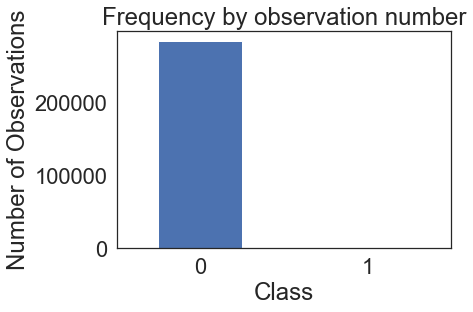

In [20]:

df.shape
df.info()
df.head()
df.describe()
print(df.Amount.describe())

# Count the occurrences of fraud and no fraud cases
fnf = df["Class"].value_counts()

# Print the ratio of fraud cases 
print(fnf/len(df))

# Plottingg your data
plt.xlabel("Class")
plt.ylabel("Number of Observations")
fnf.plot(kind = 'bar',title = 'Frequency by observation number',rot=0)

> 비정상적인 비율을 가짐

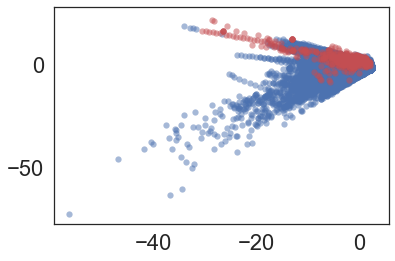

In [21]:
# Plot how fraud and non-fraud cases are scattered 
plt.scatter(df.loc[df['Class'] == 0]['V1'], df.loc[df['Class'] == 0]['V2'], label="Class #0", alpha=0.5, linewidth=0.15)
plt.scatter(df.loc[df['Class'] == 1]['V1'], df.loc[df['Class'] == 1]['V2'], label="Class #1", alpha=0.5, linewidth=0.15,c='r')
plt.show()

> 이상거래와 정상거래 케이스가 어떻게 퍼져있는지 확인할 수 있다. 

## 3. Time과 Amount 변수 분포

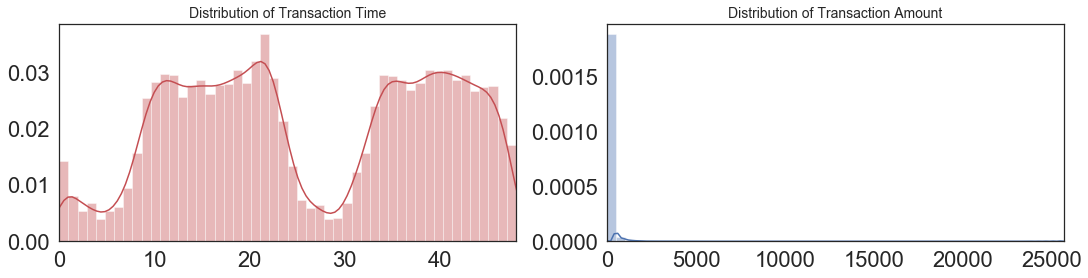

In [22]:
import seaborn as sns

fig, ax = plt.subplots(1, 2, figsize=(18,4))

# Plot the distribution of 'Time' feature 
sns.distplot(df['Time'].values/(60*60), ax=ax[0], color='r')
ax[0].set_title('Distribution of Transaction Time', fontsize=14)
ax[0].set_xlim([min(df['Time'].values/(60*60)), max(df['Time'].values/(60*60))])

sns.distplot(df['Amount'].values, ax=ax[1], color='b')
ax[1].set_title('Distribution of Transaction Amount', fontsize=14)
ax[1].set_xlim([min(df['Amount'].values), max(df['Amount'].values)])

plt.show()

> 대부분의 거래는 낮에 이루어짐 <br>
두개의 skewed 형태로 확인할 수 있다.

## 4. 데이터를 2개로 나누고 요약

In [23]:
#정상, 이상 거래로 나눔
df_nonfraud = df[df.Class == 0]
df_fraud = df[df.Class == 1] 

In [24]:
#통계적 요약 확인
print(df_nonfraud.Amount.describe())
print('_'*25)
print(df_fraud.Amount.describe())

from scipy import stats
F, p = stats.f_oneway(df['Amount'][df['Class'] == 0], df['Amount'][df['Class'] == 1])
print("F:", F)
print("p:",p)

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64
_________________________
count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64
F: 9.033344712018891
p: 0.0026512206498171095


* 요약
 - 이상거래의 평균 거래금액은 122달러, 정상거래의 평균 거래금액은 88달러이고 통계적으로 유의하다.
 - 낮은 거래금액의 경우 영향이 적을것이라고 판단, 200달러에서 2000달러 사이 거래 시각화

C:\Users\wldnj\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  
C:\Users\wldnj\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


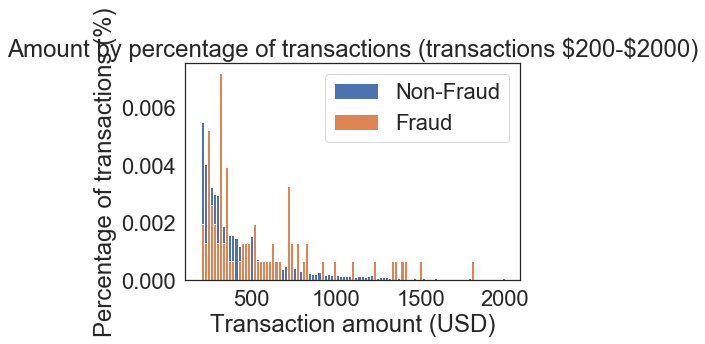

In [25]:
bins = np.linspace(200, 2000, 100)
plt.hist(df_nonfraud.Amount, bins, alpha=1, normed=True, label='Non-Fraud')
plt.hist(df_fraud.Amount, bins, alpha=1, normed=True, label='Fraud')
plt.legend(loc='upper right')
plt.title("Amount by percentage of transactions (transactions \$200-$2000)")
plt.xlabel("Transaction amount (USD)")
plt.ylabel("Percentage of transactions (%)")
plt.show()

- 오른쪽으로 긴 꼬리를 가지고 있고 이상거래의 빈도가 높다. 
- Amount 변수하나만으로는 정상거래와 이상거래를 구분하기 힘들어보인다.

## 5. Hour변수 생성

C:\Users\wldnj\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  
C:\Users\wldnj\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


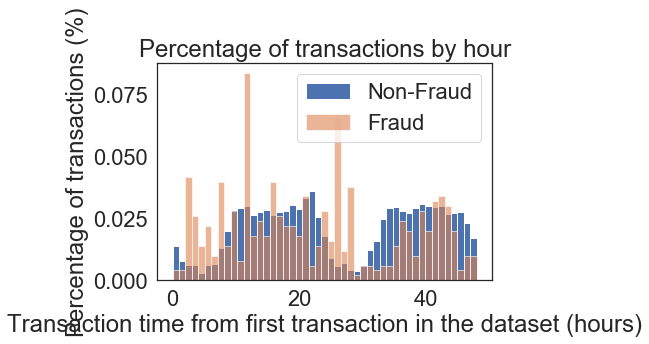

In [26]:
bins = np.linspace(0, 48, 48) #48 hours
plt.hist((df_nonfraud.Time/(60*60)), bins, alpha=1, normed=True, label='Non-Fraud')
plt.hist((df_fraud.Time/(60*60)), bins, alpha=0.6, normed=True, label='Fraud')
plt.legend(loc='upper right')
plt.title("Percentage of transactions by hour")
plt.xlabel("Transaction time from first transaction in the dataset (hours)")
plt.ylabel("Percentage of transactions (%)")
plt.show()

> 밤사이에 이상거래가 더 많이 발생하는것으로 보인다. 

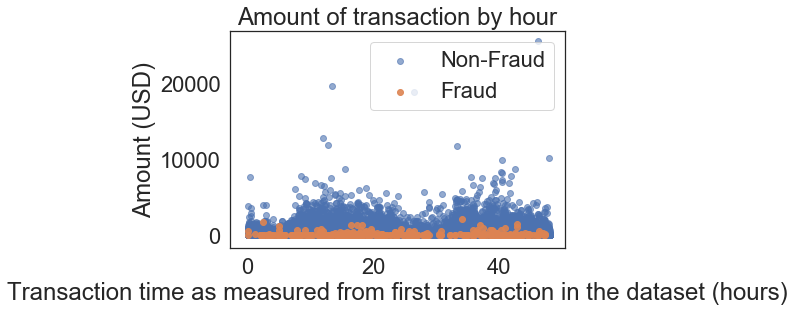

In [27]:
plt.scatter((df_nonfraud.Time/(60*60)), df_nonfraud.Amount, alpha=0.6, label='Non-Fraud')
plt.scatter((df_fraud.Time/(60*60)), df_fraud.Amount, alpha=0.9, label='Fraud')
plt.title("Amount of transaction by hour")
plt.xlabel("Transaction time as measured from first transaction in the dataset (hours)")
plt.ylabel('Amount (USD)')
plt.legend(loc='upper right')
plt.show()

In [28]:
from sklearn.preprocessing import StandardScaler, RobustScaler
df['scaled_amount'] = RobustScaler().fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = RobustScaler().fit_transform(df['Time'].values.reshape(-1,1))

# Make a new dataset named "df_scaled" dropping out original "Time" and "Amount"
df_scaled = df.drop(['Time','Amount'],axis = 1,inplace=False)
df_scaled.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,1.783274,-0.994983
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.269825,-0.994983
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,4.983721,-0.994972
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,1.418291,-0.994972
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,0.670579,-0.994960


Text(0.5, 1, "Imbalanced Correlation Matrix \n (don't use for reference)")

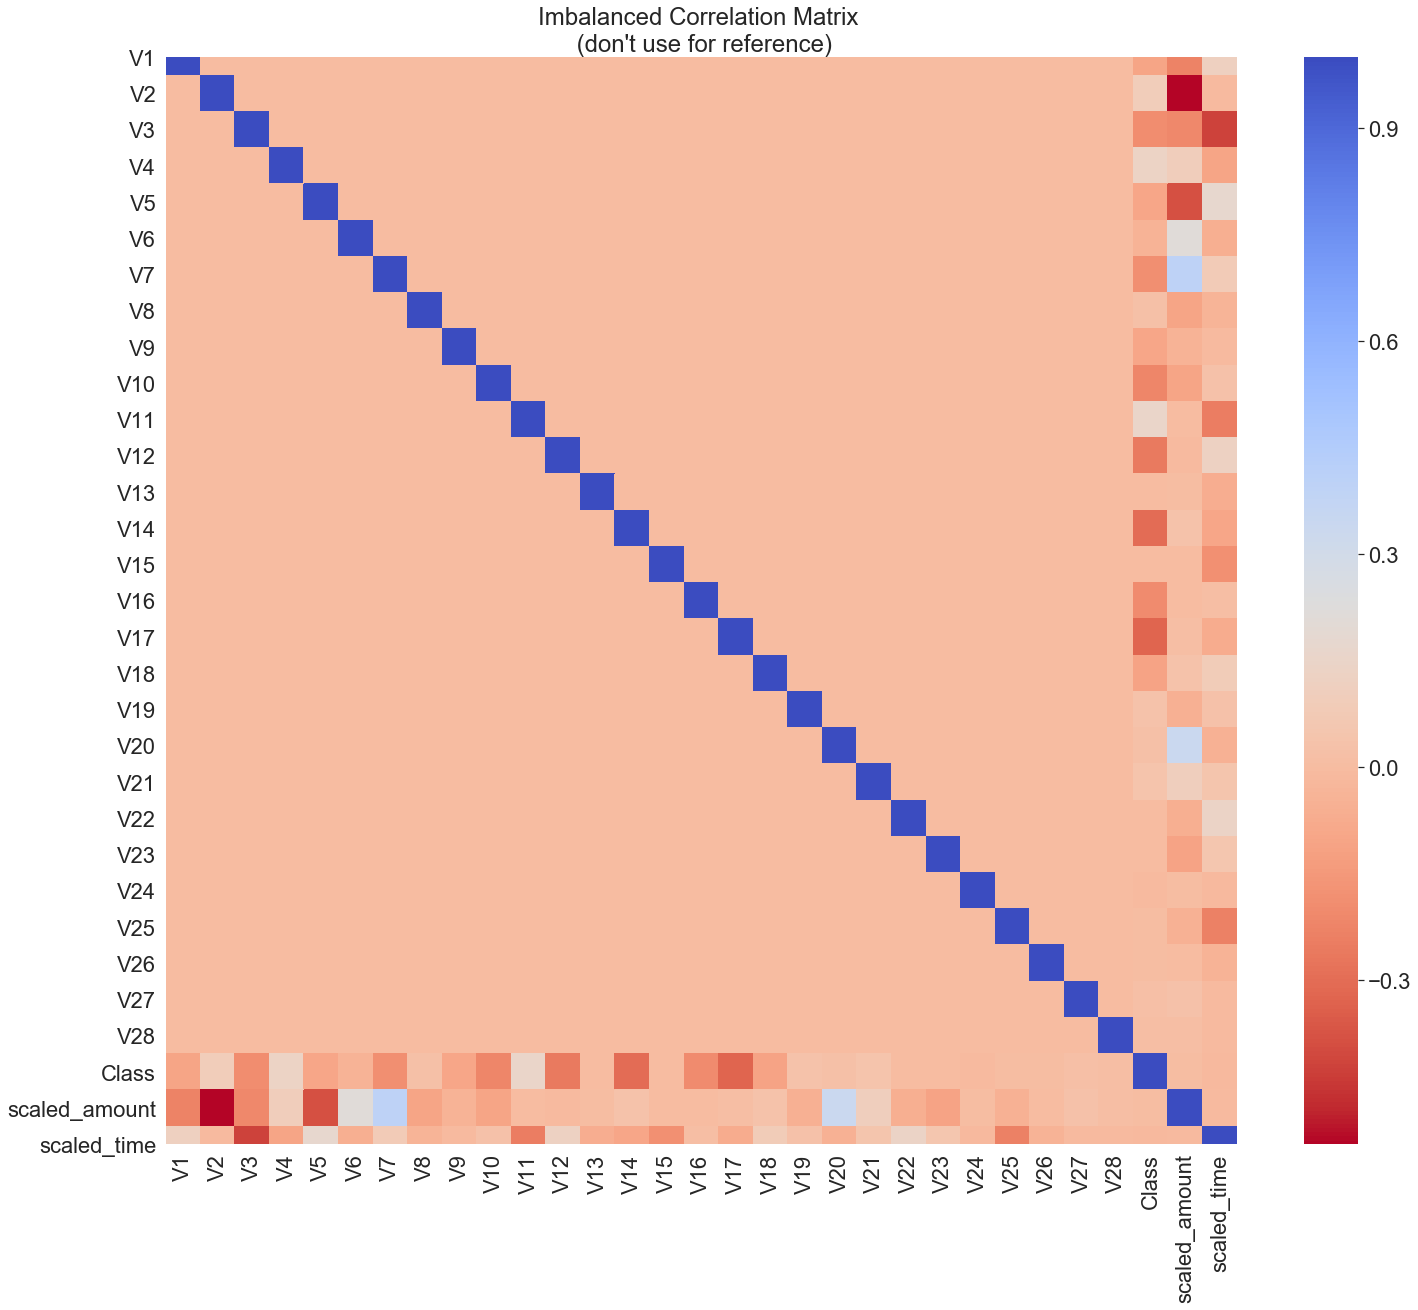

In [29]:
# Calculate pearson correlation coefficience
corr = df_scaled.corr() 

# Plot heatmap of correlation
f, ax = plt.subplots(1, 1, figsize=(24,20))
sns.heatmap(corr, cmap='coolwarm_r', annot_kws={'size':20})
ax.set_title("Imbalanced Correlation Matrix \n (don't use for reference)", fontsize=24)

> 상관관계 없음

In [30]:
# Define the prep_data function to extrac features 
def prep_data(df):
    X = df.drop(['Class'],axis=1, inplace=False) #  
    X = np.array(X).astype(np.float)
    y = df[['Class']]  
    y = np.array(y).astype(np.float)
    return X,y

# Create X and y from the prep_data function 
X, y = prep_data(df_scaled)

In [37]:
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.pipeline import Pipeline # Inorder to avoid testing model on sampled data

# Create the training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=0)


In [ ]:
#smote 코드 오류
# Define the resampling method
undersam = RandomUnderSampler(random_state=0)
oversam = RandomOverSampler(random_state=0)
smote = SMOTE( kind='regular',random_state=0)
borderlinesmote = BorderlineSMOTE(kind='borderline-2',random_state=0)

# resample the training data
X_undersam, y_undersam = undersam.fit_sample(X_train,y_train)
X_oversam, y_oversam = oversam.fit_sample(X_train,y_train)
X_smote, y_smote = smote.fit_sample(X_train,y_train)
X_borderlinesmote, y_borderlinesmote = borderlinesmote.fit_sample(X_train,y_train)

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve

def plot_pr_curve(recall, precision, average_precision):
    plt.step(recall, precision, color='b', alpha=0.2, where='post')
    plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision))
    plt.show()

def plot_roc_curve(false_positive_rate,true_positive_rate,roc_auc):
    plt.plot(false_positive_rate, true_positive_rate, linewidth=5, label='AUC = %0.3f'% roc_auc)
    plt.plot([0,1],[0,1], linewidth=5)
    plt.xlim([-0.01, 1])
    plt.ylim([0, 1.01])
    plt.legend(loc='upper right')
    plt.title('Receiver operating characteristic curve (ROC)')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

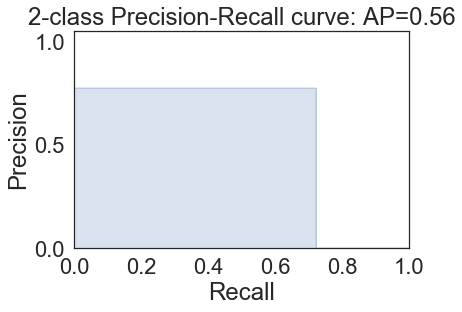

Classification report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     85296
         1.0       0.77      0.72      0.75       147

    accuracy                           1.00     85443
   macro avg       0.89      0.86      0.87     85443
weighted avg       1.00      1.00      1.00     85443

Confusion matrix:
 [[85265    31]
 [   41   106]]


In [46]:

# Create the training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=0)

# Fit a logistic regression model to our data
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Obtain model predictions
y_predicted = model.predict(X_test)

# Calculate average precision 
average_precision = average_precision_score(y_test, y_predicted)

# Obtain precision and recall 
precision, recall, _ = precision_recall_curve(y_test, y_predicted)

# Plot the recall precision tradeoff
plot_pr_curve(recall, precision, average_precision)

# Print the classifcation report and confusion matrix
print('Classification report:\n', classification_report(y_test, y_predicted))
print('Confusion matrix:\n',confusion_matrix(y_true = y_test, y_pred = y_predicted))